HR EMPLOYEE ATTRITION DATASET.
This is a fictional data set created by IBM data scientists. We need to explore the dataset, understanding the algorithms and techniques which can be applied on it. We' ll try to gain meaningful insights from the dataset, like what are the factors which have an impact on Employee Attrition.

In [1]:
#Importing our desired libraries
import numpy as np  #for linear algebra
import pandas as pd  #for data processing
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt 
%matplotlib inline 

Importing the dataset and data exploration

In [2]:
data= pd.read_csv('HR_Employee_Attrition.csv')
print(data.columns)
print(data.shape)
data.head()


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


We can see that the dataset consists of 1470 rows and 35 columns(features). let us check the number of categorcial and numerical features

In [3]:
categorical_features= data.select_dtypes(include= ['object']).columns
numerical_features = data.select_dtypes(exclude=['object']).columns
print(categorical_features)
print(numerical_features)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


We have 9 categorical features in the dataset which includes our target varaible 'Attrition'.

Let us check if there any missing values in the dataset before proceeding further

In [4]:
print(data.isnull().values.any())

False


We dont have any missing values in our dataset.

Now let us explore the relationship of our target variable 'Attrition' with other variables

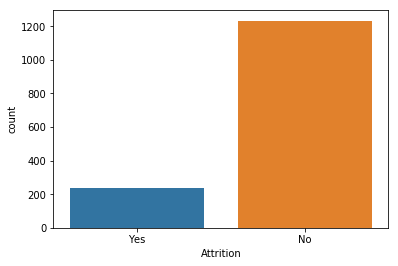

In [5]:
sns.countplot('Attrition', data=data)
plt.show()

The above plot shows the distribution of our target variable Attrition. We can see the imbalanced distribution. We will have to balance the dataset before developing our model.In this case, we are interested in identifying  the factors that lead to employee attrition(the minority class)

Let us see the correlation of our target varaible with other numerical variables

Text(0.5, 1.0, 'Correlation map')

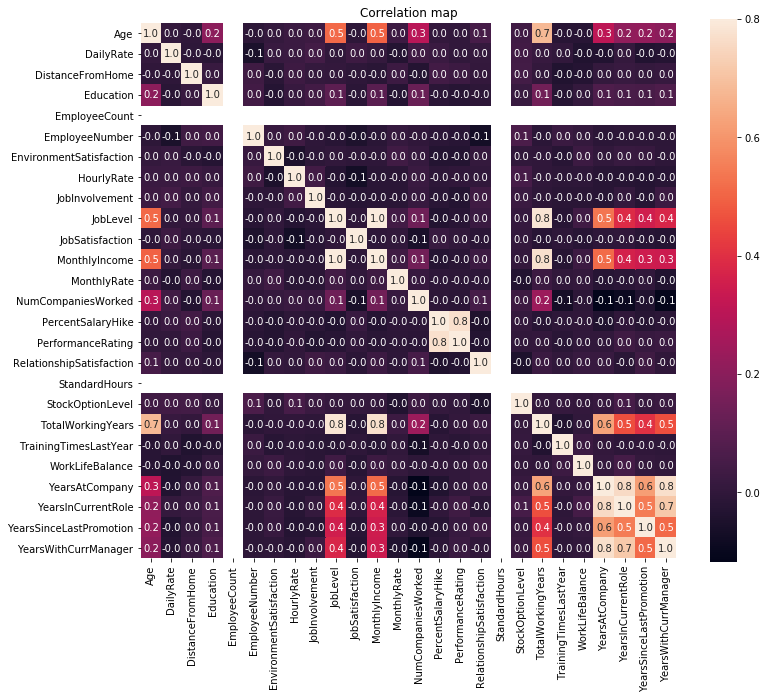

In [6]:
correlation_matrix = data.corr()
f, ax = plt.subplots(figsize= (12,10))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', vmax=.8, square=True)
plt.title('Correlation map')

The correlation matrix above shows the statistical relationship between the features. The performance of the model can deterirorate if two variables higher correlated with each other (multicollinearity). We can see that most of the features are unrelated to each other. However, we can see stron correlation among the features 'PercentSalaryHike' and 'Performance rating'. Also, 'TotalWorking' years has strong correlation with 'Joblevel' and 'MonthlyIncome' 

Now, let us  see the relationship of some features which might have role in employee attrition

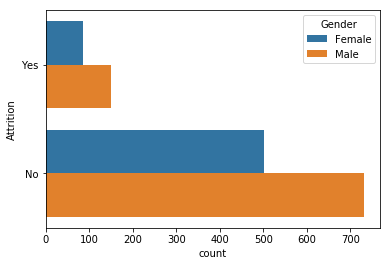

In [7]:
#Let us see who are more likely to have attrition if we consider gender as the factor
sns.countplot(y= 'Attrition', hue='Gender', data=data)
plt.show()

We can see that more number of men are likley for Attrition compared to women.

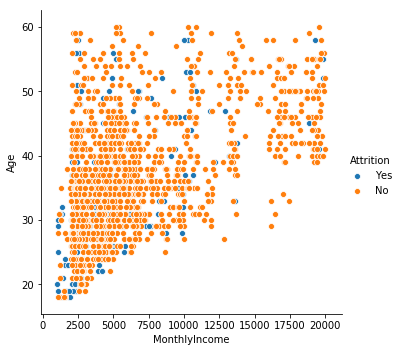

In [8]:
sns.pairplot(data=data,x_vars=['MonthlyIncome'], 
             y_vars=['Age'],height=5, hue='Attrition')

We can see that employees with Monthly income less than 7500 have more Attrition since the blue dots are more concentrated at that region.

C:\Users\18644\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


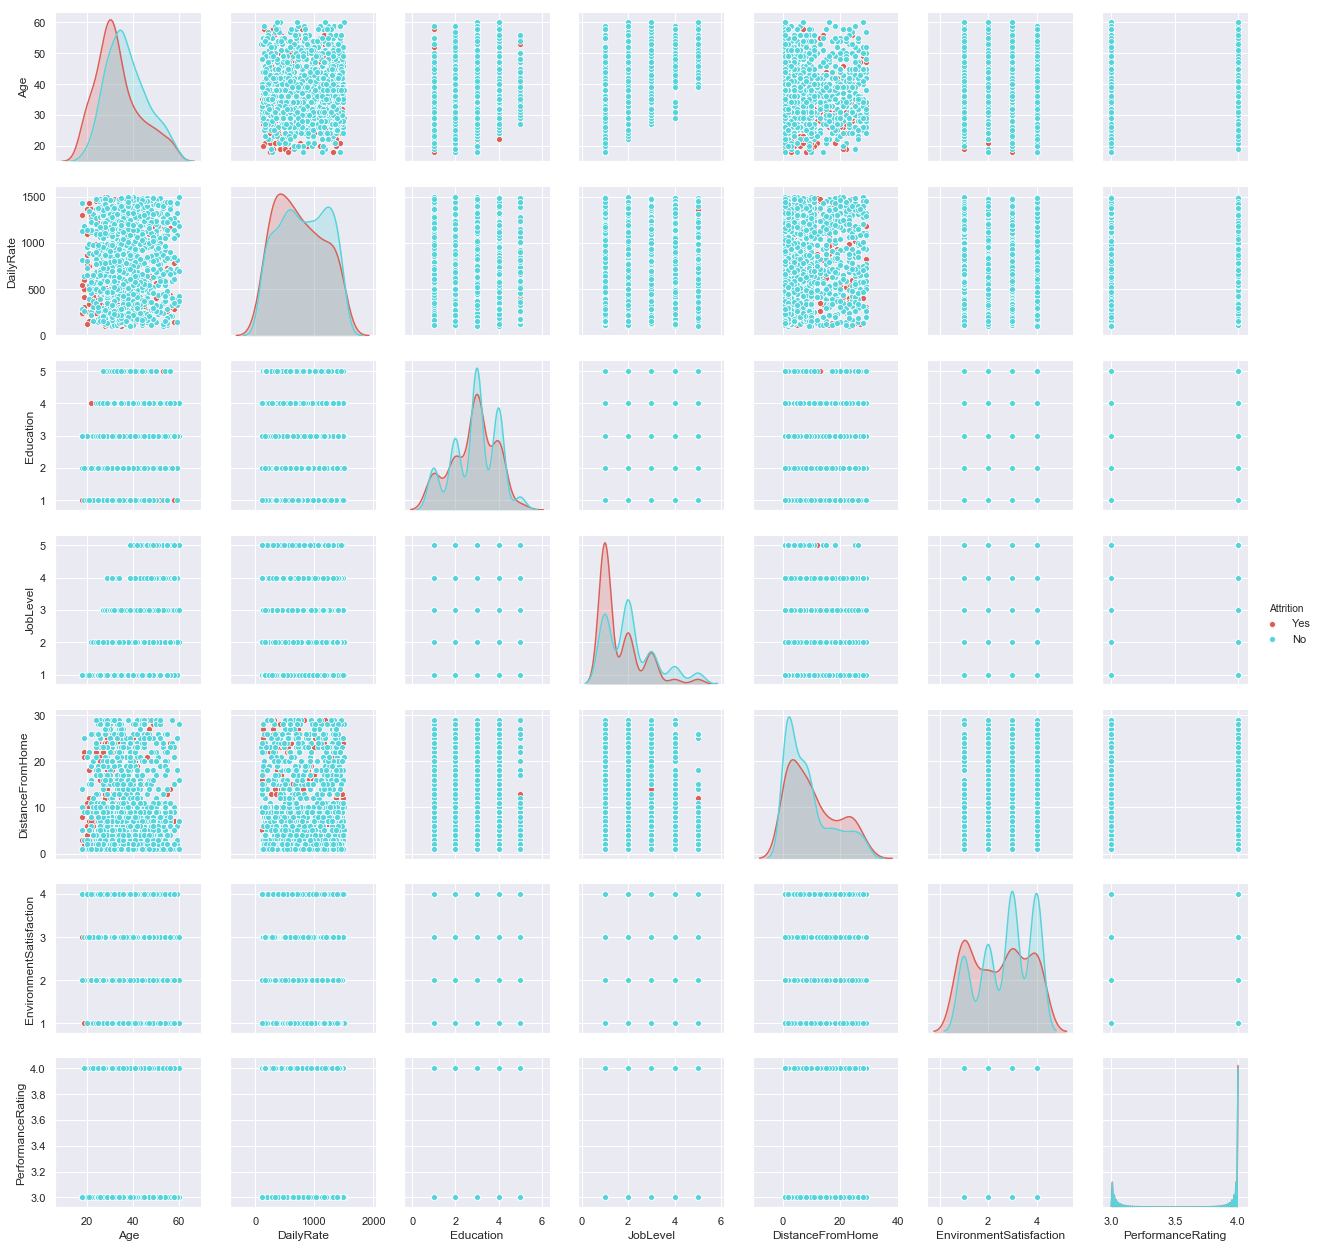

In [9]:
sns.set()
columns=['Age','DailyRate','Education','JobLevel','DistanceFromHome','EnvironmentSatisfaction','PerformanceRating','Attrition']
sns.pairplot(data[columns],hue='Attrition',height=2.5,palette="hls")

We can see employess in the lower age group are more likely to have attrition.
Employees living less than 20(minutes?)distance from the home have higher attrition
Employees with lower level of environmental satisfaction seems to have higher attrition
Employees with job level(<4) seems to have higher attrition

Now let us convert our target variable 'Attrition' to numerical form

In [10]:
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

Let us develop the  features and target to fit the model

In [11]:
features = pd.get_dummies(data.drop(columns=['Attrition','DailyRate','MaritalStatus','Over18','StandardHours','EmployeeCount','EmployeeNumber'])).dropna()
target = data['Attrition']

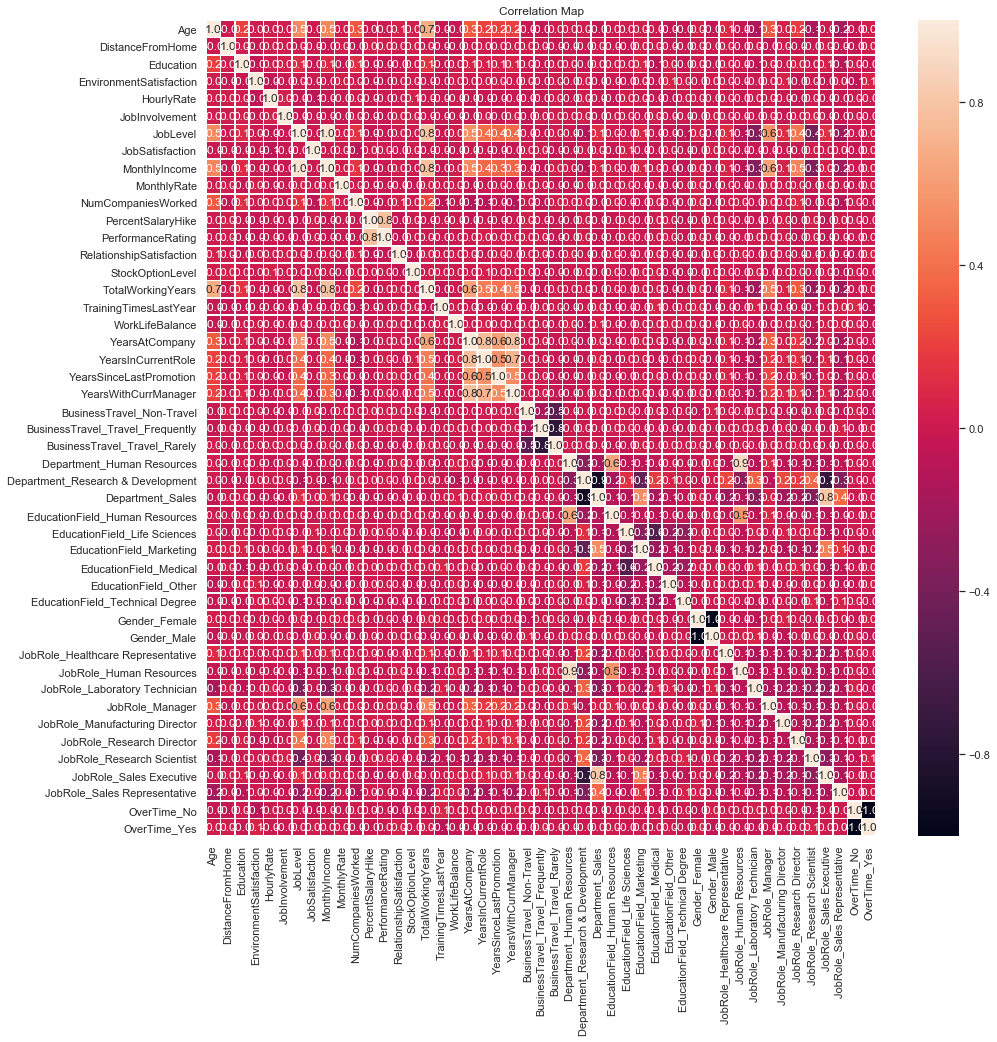

In [12]:
f,ax=plt.subplots(figsize = (15,15))
sns.heatmap(features.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

In [13]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 47 columns):
Age                                  1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1470 non-null int64
MonthlyRate                          1470 non-null int64
NumCompaniesWorked                   1470 non-null int64
PercentSalaryHike                    1470 non-null int64
PerformanceRating                    1470 non-null int64
RelationshipSatisfaction             1470 non-null int64
StockOptionLevel                     1470 non-null int64
TotalWorkingYears                    1

Build model
Let us split our dataset to training for modeling and test set for evaluation 

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.3 )
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 47)
(441, 47)
(1029,)
(441,)


In [17]:
#Importing Libraries for our model
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc_model = rfc.fit(X_train, y_train)
y_predicted = rfc.predict(X_train)

In [18]:
print('Accuracy:', rfc.score(X_train, y_train))

Accuracy: 1.0


In [19]:
print('Accuracy:', rfc.score(X_test, y_test))

Accuracy: 0.8639455782312925
